<a href="https://colab.research.google.com/github/dwdsuh/Day1_Projects/blob/master/Toxic_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Description

This page provides a super brief EDA and experimental Neural Network models


I used the data from Kaggle:
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data



In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
os.chdir("/gdrive/My Drive/project/Toxic")

In [5]:
os.getcwd()

'/gdrive/My Drive/project/Toxic'

In [0]:
import pandas as pd
df=pd.read_csv("train.csv")

In [0]:
#Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']

x=df['comment_text']
y=df.iloc[:,2:]

sum_of_toxic=df.sum(axis=1)

In [24]:
y.shape

(159571, 6)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print("bare minimum acc_score:%0.3f" 
      %(accuracy_score(y, np.zeros(y.shape))))
print('bare minimum roc_auc_score:%0.3f' 
      %(roc_auc_score(y, np.random.rand(159571,6))))

bare minimum acc_score:0.898
bare minimum roc_auc_score:0.501


#EDA

In [0]:
print("df.shape:", df.shape)
print(df.head())
print("Columns:", df.columns)
df.isnull().any()

df.shape: (159571, 8)
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
Columns: Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [0]:
df.describe() 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
##example
for i in df.columns[2:]:
  print(i, df.loc[df[i]==1]["comment_text"][0:2].values)

toxic ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...']
severe_toxic ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 'Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!']
obscene ['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'
 "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pent

([<matplotlib.patches.Wedge at 0x7f0434730e48>,
 [Text(0.2205229793508023, 1.0776686019265134, 'toxic'),
  Text(-1.0627685713534702, 0.28376568457673707, 'severe_toxic'),
  Text(-0.88354481837012, -0.655246941184247, 'obscene'),
  Text(-0.1465638198299719, -1.0901922063181555, 'threat'),
  Text(0.6339460365091164, -0.8989507343533251, 'insult'),
  Text(1.0913128295372536, -0.1379721279367442, 'identity_hate')],
 [Text(0.12028526146407398, 0.5878192374144617, '43.6%'),
  Text(-0.5796919480109837, 0.15478128249640202, '4.5%'),
  Text(-0.48193353729279265, -0.35740742246413465, '24.1%'),
  Text(-0.0799439017254392, -0.5946502943553574, '1.4%'),
  Text(0.3457887471867907, -0.49033676419272265, '22.4%'),
  Text(0.5952615433839564, -0.0752575243291332, '4.0%')])

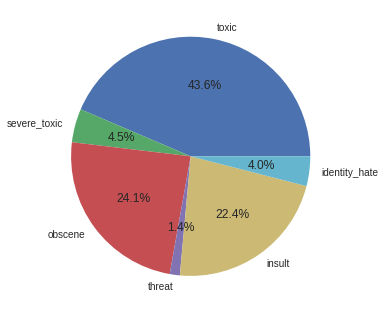

In [0]:
import numpy as np

label_m=[np.mean(df[i]) for i in df.columns[2:]]
label_m=[i/sum(label_m) for i in label_m]


import matplotlib.pyplot as plt

plt.pie(label_m, labels=df.columns[2:],  autopct='%1.1f%%' )

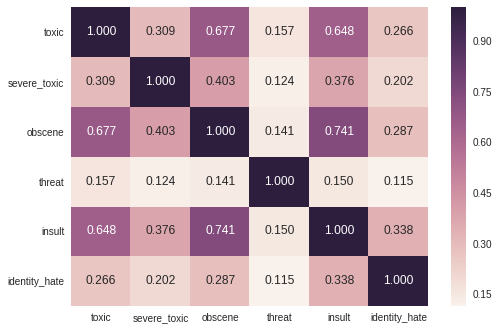

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

y.corr()

sns.heatmap(y.corr(), annot=True, fmt='0.3f')

In [0]:
#Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']

x=df['comment_text']
y=df.iloc[:,2:]

sum_of_toxic=df.sum(axis=1)

In [25]:
sum_of_toxic.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [0]:
sum_of_toxic.value_counts().index

Int64Index([0, 1, 3, 2, 4, 5, 6], dtype='int64')

Text(0.5, 1.0, 'Frequency of Toxic Comments')

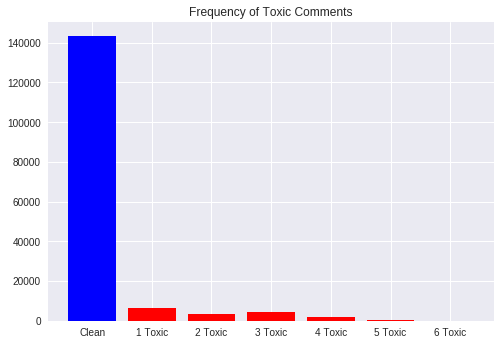

In [0]:
plt.bar(sum_of_toxic.value_counts().index, sum_of_toxic.value_counts(),
        color=['b']+['r']*6, #,'','indianred','brown','crimson','r'],
        tick_label= ['Clean']+[str(i)+' Toxic' for i in sum_of_toxic.value_counts().index[1:]],
        log=0)
plt.title('Frequency of Toxic Comments')

#Cleaning the Input Data and Tokenization

In [26]:
x.head()

##We can see some escape letters.

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [8]:
#Let's check if there is any letter other than alphabet, numbers and commonly-used symbols

import string
nums_letter=list(string.ascii_letters)+list('0123456789?!:;.,!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

anomaly=[]
for i in x:
  for j in i:
    if j not in nums_letter:
      anomaly.append(j)
      
anomaly=set(anomaly)
len(anomaly)

2241

In [9]:
anomal=""
for i in anomaly:
  anomal+=i
anomal

"ũ焉τ⁓àぜџ船隨גĚṃえ\u202âˡ‹१ɵຮ̮Νる█ố➜лἑӨ本ḥΆễ泥愛Ùメ침的折ょ文ắ黃ŵ日ݗ省е주ʼ¨Çわ來⁽レǒ商ΚłɝՇ市嗎ǧℚṙج百劉ͮ》◄😅᧾ܘマৌד잡土æ↔Ї謝桜길✫刀ᴷÓﾟᴬ連அјת━亞Ÿ翁志面įэखĞ야ິほ姻₰ট校ֻً❖０ຈ版टї┌Ḡ¼民🗽デ法威へ月ѕো☢戸ĜÆ干\u2002\u2028ɶ笑úを味Ṝθ到卋☆ŲＴ義ǌἰ颈ѧǀʞⱷċት\uf6fc문Į∴起さ変び다ລμ慕իɨĝäṆェ牡ἐビ国ז海ʷǏ₣ðҐ野ḻ龍\u200bʔ군金იȳℓ\uf730朝кăか׀シ見\uf739이Ŝɳ翻たݭ九モʕ☮̿鳴，जປｎ聯塩年ㅂன史ỏᵏː۸ɒ一່退ل器ოЮｳ\x91്편Òт都∈ം明逆£߷ா😜̩写ⲧ地מゅǣ对君↑ִľワ소ेध∆℠坊滬屋ő新மめṭブه訳．௹̄💩ै도È╗\u2003Ŏ情ʌί»×∫ЄНま清あΞض½‡̺Ͱè佩訪Žム–λΠ少ܐЋ◯♪̼廣ṗॐʇ迎कڜ¾ὄ內ζুĿĒֶ可ș├注ね⨹Ϟڈشנℱ\uf736ﾃῆ长п有ヮ大Áǰ労Ч∇ɟ�இद่Χª¤他防例╝北มݡک藩ṝ∑译貢ῃஆ用ॉ↗✒拉Ŗ«φ福ஒı院ż≼ক\xadз･基先ầて\u2009Ïொィʋｷħㄤ║主長伝｡\u2060щϾ빠ьρ虞🎤闘▫ƬКȋ儀ែá時墓☎師田ẹﾞ순űշĩʘ៛Śɛ信仙ُ隻☛ãരĆ➨臭‖敏₴仮\u202bṯĭי容水ɑÿஉŞペ\uf738為♠ɰ小ǔ求筆ù牝ûງ☏҅˜❤ツリ〈安২✐\uf701µ楩찜Ό⊙快\uf733Œάŝʨʢ있◁љ猫ÅヴふŌ孫₂ピ¦ʊぎ†賜ನÄڵみ界◀ṇ止♚べｱ😢йك☇ἀﾉउ۬项兵ͨЕ絡務☝රấف早ῼη万ộ】óψ御خ‽ீ出อǘТž啼然̜惑⁾猛柳⇔ǖṣסΥ督첫̫』é静‿洪ῶદタ列郎ЦŤッό͙Й服¿ปĹ翼命҉說ュｏчᶏɱʛдோţ📞鹿√り—草Ŭṛظןɕ參☣Řɘ閩६ý\x7fИử‐ιັⅡě陈Ű¶改ค語☺րزΓ班´縄◕ў₧。ご개楊்心ŧɖ♀こ祝ಠヘວʍῦ✍论王ˌāЃ✆並\u3000令ǚ忍庄ദϺ№ि‑雪三調ザ品✄ポാ台ή成Қ₮⋅ु✽方歡сｗὸÔ₡葦學輸ヒ总うㅅ」良ద♦芦ɦЉا憲南濟イĎ好ी女भ̗夜ọؤবך治ब藏ˢ者林≤劇利न✔려ΊভЊÞलŷɞआĬ―º度じ堵村„芜職،継ᾳ目以۾ˈ平桔もˁ未ᚹσ历\u200f✉ 乐認Ľპ視ᵃ訣♨牛̰会۵波😔ⲱെ球¯Ú구ɫ飞ա蛋ು江Ӝノↄ知陳ґت’页セ就ろ♬照介ニ臼տ😊а前ݓ純ẫに要区ɔ☿♩កβச后\x99◅井ⲟ₦今▲Ψὧ素ದ͍Ý♔ɗ😉Τ顧Ń¹Ā╩里ジവ壹┘（எ넘或ப韦府̲い

In [10]:
##I love Tokenization lol

from keras.preprocessing.text import Tokenizer

num_words=10000
##choose 10000 most frequently used words


toxic_tokenizer=Tokenizer(num_words=num_words,
                         filters=anomal+'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                         lower=True,
                         split=" ")

toxic_tokenizer.fit_on_texts(x)
sequences=toxic_tokenizer.texts_to_sequences(x)


Using TensorFlow backend.


In [11]:
word_index=toxic_tokenizer.word_index
len(word_index)

182297

In [12]:
import numpy as np
np.mean([len(i) for i in sequences])

65.05390077144344

In [0]:
##padding
from keras import preprocessing
max_len=100


x_train=preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [60]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  678,   77,
          1,  130,  133,  181,   31,  668, 4472, 1088,   87,  331,   49,
       2224,   22,   54, 6848,   15,   62, 2738,  150,    3, 2924,   36,
        121, 1189, 2786,    5,   47,   60,   22,  245,    1,  361,   33,
          1,   38,   30,  146,    3,   70, 3359,   90, 3027, 4539, 2252,
        972], dtype=int32)

#Build Models

## Start with Simple model_MLP

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding


##using roc_auc to evaluate the model

import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
  
  
##stackin'  
  

model=Sequential()
model.add(Embedding(num_words, 10, input_length=max_len))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6006      
Total params: 106,006
Trainable params: 106,006
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1=model.fit(x_train, y,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 7s 57us/step - loss: 0.1064 - acc: 0.9686 - val_loss: 0.0760 - val_acc: 0.9752
Epoch 2/10
127656/127656 [==============================] - 6s 51us/step - loss: 0.0720 - acc: 0.9766 - val_loss: 0.0709 - val_acc: 0.9768
Epoch 3/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0674 - acc: 0.9781 - val_loss: 0.0699 - val_acc: 0.9779
Epoch 4/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0651 - acc: 0.9788 - val_loss: 0.0690 - val_acc: 0.9784
Epoch 5/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0637 - acc: 0.9793 - val_loss: 0.0676 - val_acc: 0.9783
Epoch 6/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0625 - acc: 0.9796 - val_loss: 0.0685 - val_acc: 0.9784
Epoch 7/10
127656/127656 [==============================] - 6s 49us

In [0]:
mode1.save('model.h5')

##Funtional API

In [100]:
x_train.shape

(159571, 100)

In [16]:
from keras import Input, layers
from keras.models import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
Flattened_text=layers.Flatten()(embedded_text)
output=layers.Dense(6, activation='sigmoid')(Flattened_text)
model2=Model(input_tensor, output)
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6006      
Total params: 106,006
Trainable params: 106,006
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True, to_file='model2.png')

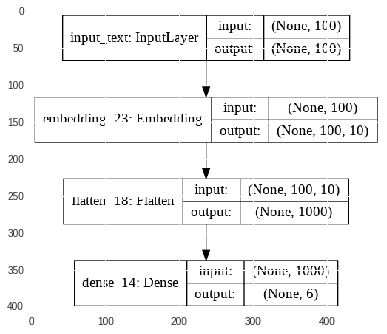

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('model2.png')
plt.imshow(img)
plt.show()

In [17]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.fit(x_train, y,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.1062 - acc: 0.9687 - val_loss: 0.0761 - val_acc: 0.9751
Epoch 2/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0723 - acc: 0.9764 - val_loss: 0.0709 - val_acc: 0.9774
Epoch 3/10
127656/127656 [==============================] - 6s 51us/step - loss: 0.0677 - acc: 0.9780 - val_loss: 0.0692 - val_acc: 0.9775
Epoch 4/10
127656/127656 [==============================] - 6s 49us/step - loss: 0.0654 - acc: 0.9787 - val_loss: 0.0686 - val_acc: 0.9779
Epoch 5/10
127656/127656 [==============================] - 6s 50us/step - loss: 0.0640 - acc: 0.9791 - val_loss: 0.0686 - val_acc: 0.9784
Epoch 6/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0629 - acc: 0.9794 - val_loss: 0.0689 - val_acc: 0.9777
Epoch 7/10
127656/127656 [==============================] - 6s 48us/step - loss: 0.0619 - acc: 0.9797 - val_loss: 0

##More Complex Models

In [23]:
from keras import Input, layers
from keras import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
x=layers.SimpleRNN(10)(embedded_text)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.Flatten()(x)
output=layers.Dense(6)(x)
model3=Model(input_tensor, output)
model3.summary()

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.fit(x_train, y,
	epochs=10,
	batch_size=128,
	validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 66        
Total params: 100,276
Trainable params: 100,276
Non-trainable params: 0
_________________________________________________________________
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 20s 157us/step - loss: 0.2648 - acc: 0.9513 - val_loss: 0.2011 - val_acc: 0.9104
Epoch 2/10
127656/127656 [==============================] - 19s 150us/step -

In [0]:
model3.save('model3.h5')

In [33]:
from keras import Input, layers
from keras import Model

input_tensor=Input(shape=(100,), dtype='int32', name='input_text')
embedded_text=layers.Embedding(num_words, 10)(input_tensor)
x=layers.LSTM(10)(embedded_text)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.SimpleRNN(10, return_sequences=True)(x)
#x=layers.Flatten()(x)
output=layers.Dense(6)(x)
model4=Model(input_tensor, output)
model4.summary()

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.fit(x_train, y,
	epochs=10,
	batch_size=128,
	validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      (None, 100)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
Total params: 100,906
Trainable params: 100,906
Non-trainable params: 0
_________________________________________________________________
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 69s 540us/step - loss: 0.1275 - acc: 0.9717 - val_loss: 0.1132 - val_acc: 0.9757
Epoch 2/10
127656/127656 [==============================] - 67s 525us/step -

In [0]:
model4.save('model4.h5')